In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fruits = np.load('./fruits_300.npy')

In [4]:
fruits.shape

(300, 100, 100)

In [5]:
fruits_2d = fruits.reshape(-1, 100 * 100)

In [6]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [8]:
km.labels_.shape

(300,)

In [9]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

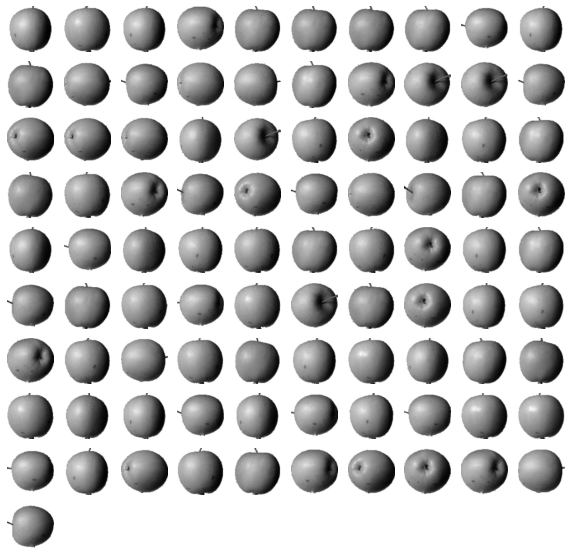

In [13]:
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n / 10))
  cols = n if rows < 2 else 10
  figs, axes = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      idx = i * 10 + j

      if idx < n:
        axes[i, j].imshow(arr[idx], cmap='gray_r')
      
      axes[i, j].axis('off')
  
  plt.show()


draw_fruits(fruits[km.labels_ == 2])

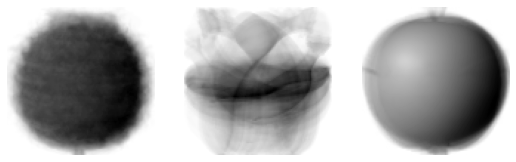

In [14]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [16]:
km.transform(fruits_2d[100:101])

array([[3393.8136117 , 8837.37750892, 5267.70439881]])

In [21]:
km.predict(fruits_2d[100:101])

array([0], dtype=int32)

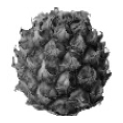

In [23]:
draw_fruits(fruits[100:101], ratio = 2)

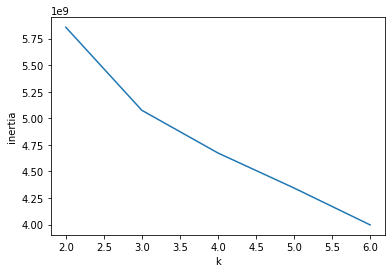

In [24]:
inertia = []

for k in range(2, 7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()